In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from scipy.stats import pearsonr

import copy

In [3]:
df= pd.read_table('./Pre_processed_data/merged_dataframe_shopping.csv', delimiter= ',', encoding='euc-kr')

In [4]:
df.head()

,Unnamed: 0,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,BUY_AM,BUY_CT,AGE_PRD,HOM_PST_NO,...,PD_M_NM,PD_H_NM,IS_MALE,IS_FEMALE,YEAR,MONTH,DAY,HOUR,PRVIN,DESTRICT
0,0,4008,2108,A01,215,2,59600,2,50,056,...,캐주얼,여성의류,0,1,2015,2,16,13,서울특별시,송파구
1,1,6379,2109,A01,75,29,35000,1,40,480,...,건강식품,식품,1,0,2015,2,13,11,부산광역시,해운대구
2,2,6379,2109,A01,149,4,85000,1,40,480,...,화장품,잡화,1,0,2015,1,15,10,부산광역시,해운대구
3,3,8002,2110,A01,138,10,25000,1,30,300,...,섬유잡화,잡화,0,1,2015,12,20,10,세종특별자치시,NaN
4,4,8002,2110,A01,138,10,21000,1,30,300,...,섬유잡화,잡화,0,1,2015,12,20,10,세종특별자치시,NaN


In [5]:
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [6]:
df.drop(['YEAR', 'MONTH', 'DAY', 'HOUR'], axis= 1, inplace= True)

### pandas의 groupby, unstack 함수를 통해 ID, 소비 소품목 별로 정리된 DataFrame을 만들었음.

In [42]:
df_restructured= df.groupby(['ID', 'PD_M_NM']).agg({'BUY_CT': 'count'})

In [43]:
df_restructured.head()

BUY_CT
ID PD_M_NM        
1  가공식품         10
   건강선물세트        1
   골프용품          6
   기타의류          1
   농산물           3

In [44]:
df_restructured= df_restructured.unstack(['PD_M_NM'])

In [45]:
df_restructured.columns= df_restructured.columns.droplevel()

In [46]:
df_restructured.columns.name= None

In [47]:
df_restructured.head()

,(구)1차식품,(구)과일야채,1차식품,BABY/INFANT,BOYS 1,BOYS 2,DIY욕실용품,EDUCATION 1,EDUCATION 2,Fast Food,...,화장비누/바디클렌저,화장지,화장지/티슈,화장품,황태,훼이셜케어,휴대폰/주변기기,휴대폰용품,휴지통,흰우유
ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
3,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0


In [48]:
df_restructured.fillna(0, inplace= True)

### Feature Selecting을 진행하였음.
이 때 Selecting의 기준은 표준편차 0.1 이상, 다른 Feature와의 Correlation이 0.2 이상을 넘지 않는 Feature로 설정하였음. 두 Feature의 Correlation이 0.2가 넘는 경우는 분석 시 정보량이 많을 것으로 추정되는 표준편차가 높은 Feature를 선택하였음.

### 표준편차가 지나치게 낮은 feature를 제거하였음.

In [49]:
dict_std= df_restructured.std(axis= 0).to_dict()

In [50]:
dict_std

{'(구)1차식품': 0.10976434261178716,
 '(구)과일야채': 0.0073422309821426735,
 '1차식품': 0.14914084085102136,
 'BABY/INFANT': 0.9586084206397295,
 'BOYS 1': 2.2083999714715516,
 'BOYS 2': 0.8428414780530739,
 'DIY욕실용품': 0.05773546737502966,
 'EDUCATION 1': 0.9928232685553731,
 'EDUCATION 2': 0.9344869338080154,
 'Fast Food': 0.2863705287110448,
 'GIRLS': 1.1554355228490047,
 'H&B선물세트': 0.19360996927212537,
 'Hot Food': 0.07519112027571344,
 'LOCAL김치채소': 0.25982402731933424,
 'LOCAL잎채소': 1.390958032676516,
 'SPORTS/OUTDOOR': 1.11716416018917,
 'TRAVEL': 0.17075574342436903,
 'VIDEOGAME': 0.2543934652108923,
 '가공건식품': 0.9556009540926048,
 '가공란': 0.48863543893949324,
 '가공면류': 0.03742925071584464,
 '가공미반류': 0.5966376616840107,
 '가공분말류': 1.0069284094581141,
 '가공식품': 23.46436748086761,
 '가공양곡': 0.410399070248275,
 '가공우유': 7.863613240061954,
 '가구': 0.6933210159871174,
 '가루': 1.67864398646958,
 '가방': 0.14727367503741878,
 '가방브랜드': 0.15720543973823795,
 '가정잡화': 5.657971455190348,
 '간식': 2.9633205553289788,

In [51]:
ftlist= df_restructured.loc[:, df_restructured.std(axis= 0) > 0.1].columns.tolist()

In [56]:
df[df['PD_M_NM'].isin(ftlist)][['PD_H_NM', 'PD_M_NM']].drop_duplicates()

# 표준편차 0.1 이상으로 나타나는 Feature들이며, 그 개수는 597개임

,PD_H_NM,PD_M_NM
0,여성의류,캐주얼
1,식품,건강식품
2,잡화,화장품
3,잡화,섬유잡화
5,잡화,구두
6,식품,가공식품
7,여성의류,트래디셔널
11,스포츠,스포츠
13,명품,명품
15,잡화,액세서리


In [53]:
print(len(ftlist))

597


In [54]:
not_ftlist=df_restructured.loc[:, df_restructured.std(axis= 0) < 0.1].columns.tolist()

In [55]:
print(len(not_ftlist))

93


In [49]:
df[df['PD_H_NM'].isin(not_ftlist)][['PD_H_NM', 'PD_M_NM']].drop_duplicates()

# 표준편차 0.1 미만으로 나타나는 Feature들이며, 그 개수는 93개임. 해당 Feature는 제외하였음.

,PD_H_NM,PD_M_NM
1508,곡물,양곡
1630,자동차용품,세차용품
8183,자동차용품,교환/보수용품
8278,자동차용품,자동차방향제/소취제
9723,곡물,잡곡
17184,자동차용품,휴대폰용품
22570,자동차용품,자동차 편의용품
23442,자동차용품,장착용품
36222,자동차용품,자동차장식용품
56344,자동차용품,카시트/매트


In [67]:
grp= sns.distplot(df_restructured.loc[:, df_restructured.std(axis= 0) > 0.1].mean(axis=0), kde= False)

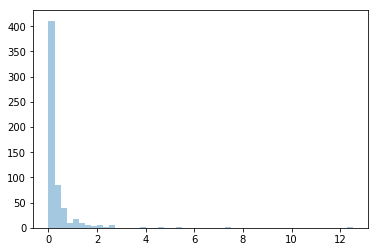

In [68]:
plt.show()

In [69]:
grp= sns.distplot(df_restructured.loc[:, df_restructured.std(axis= 0) > 0.1].std(axis=0), kde= False)

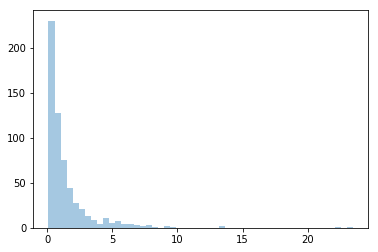

In [70]:
plt.show()

In [71]:
grp= sns.distplot(df_restructured.loc[:, df_restructured.std(axis= 0) < 0.1].mean(axis=0), kde= False)

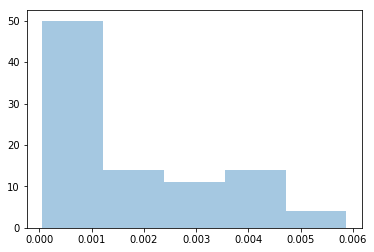

In [72]:
plt.show()

# 해당 코드에서 표준편차가 작게 나타난 품목들의 경우 품목의 평균이 0~0.008 수준으로 나타났음.
# 이러한 소품목의 경우 정보를 거의 가지고 있지 않은 것으로 판단하였음.

In [73]:
grp= sns.distplot(df_restructured.loc[:, df_restructured.std(axis= 0) < 0.1].std(axis=0), kde= False)

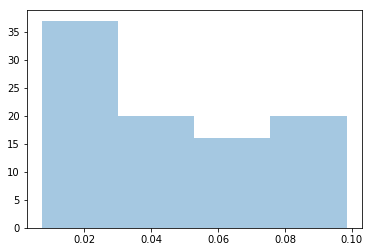

In [74]:
plt.show()

In [57]:
df_ft_select= df_restructured[ftlist]

In [58]:
df_ft_select.head()

,(구)1차식품,1차식품,BABY/INFANT,BOYS 1,BOYS 2,EDUCATION 1,EDUCATION 2,Fast Food,GIRLS,H&B선물세트,...,화장비누/바디클렌저,화장지,화장지/티슈,화장품,황태,훼이셜케어,휴대폰/주변기기,휴대폰용품,휴지통,흰우유
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


### 다른 feature와 상관관계를 가지는 feature를 제거하였음.

In [66]:
loop_list= copy.deepcopy(ftlist)
remove_list= []
remain_list= []
while loop_list:
    ft= loop_list.pop(0)
    remain_list.append(ft)
    print(ft)
    for ft2 in loop_list:
        (coef_, p_val)= pearsonr(df_restructured[ft], df_restructured[ft2])
        if p_val<=0.05 and abs(coef_)>0.2:
            if dict_std[ft]>dict_std[ft2]:
                print('{} is deleted- remain: {}, coef_: {:4f}, p_val: {:4f}, dict_std: {:4f}, {:4f}'.format(ft2, ft, coef_, p_val, dict_std[ft], dict_std[ft2]))
                remove_list.append(ft2)
            else:
                print('{} is deleted- remain: {}, coef_: {:4f}, p_val: {:4f}, dict_std: {:4f}, {:4f}'.format(ft, ft2, coef_, p_val, dict_std[ft], dict_std[ft2]))
                remain_list.remove(ft)
                break
    if remove_list:
        for elmt in remove_list:
            loop_list.remove(elmt)
        remove_list= []


(구)1차식품
(구)1차식품 is deleted- remain: 1차식품, coef_: 0.280399, p_val: 0.000000, dict_std: 0.109764, 0.149141
1차식품
1차식품 is deleted- remain: 냉동면밥류, coef_: 0.207801, p_val: 0.000000, dict_std: 0.149141, 0.170148
BABY/INFANT
BABY/INFANT is deleted- remain: BOYS 1, coef_: 0.229887, p_val: 0.000000, dict_std: 0.958608, 2.208400
BOYS 1
BOYS 2 is deleted- remain: BOYS 1, coef_: 0.333323, p_val: 0.000000, dict_std: 2.208400, 0.842841
EDUCATION 1 is deleted- remain: BOYS 1, coef_: 0.373646, p_val: 0.000000, dict_std: 2.208400, 0.992823
EDUCATION 2 is deleted- remain: BOYS 1, coef_: 0.238027, p_val: 0.000000, dict_std: 2.208400, 0.934487
GIRLS is deleted- remain: BOYS 1, coef_: 0.331760, p_val: 0.000000, dict_std: 2.208400, 1.155436
SPORTS/OUTDOOR is deleted- remain: BOYS 1, coef_: 0.352725, p_val: 0.000000, dict_std: 2.208400, 1.117164
서적 is deleted- remain: BOYS 1, coef_: 0.257677, p_val: 0.000000, dict_std: 2.208400, 1.071171
BOYS 1 is deleted- remain: 아동, coef_: 0.202530, p_val: 0.000000, dict_st

전통음료 is deleted- remain: 가공우유, coef_: 0.334174, p_val: 0.000000, dict_std: 7.863613, 0.506404
젤리 is deleted- remain: 가공우유, coef_: 0.323252, p_val: 0.000000, dict_std: 7.863613, 0.346141
주스 is deleted- remain: 가공우유, coef_: 0.492078, p_val: 0.000000, dict_std: 7.863613, 1.464290
차음료 is deleted- remain: 가공우유, coef_: 0.353172, p_val: 0.000000, dict_std: 7.863613, 2.709556
쵸코렛 is deleted- remain: 가공우유, coef_: 0.403774, p_val: 0.000000, dict_std: 7.863613, 2.802498
치약 is deleted- remain: 가공우유, coef_: 0.225910, p_val: 0.000000, dict_std: 7.863613, 0.286353
치약칫솔세트 is deleted- remain: 가공우유, coef_: 0.217163, p_val: 0.000000, dict_std: 7.863613, 0.160979
칫솔 is deleted- remain: 가공우유, coef_: 0.305245, p_val: 0.000000, dict_std: 7.863613, 0.173800
캔 is deleted- remain: 가공우유, coef_: 0.319410, p_val: 0.000000, dict_std: 7.863613, 0.435600
캔디류 is deleted- remain: 가공우유, coef_: 0.468798, p_val: 0.000000, dict_std: 7.863613, 2.598504
캔맥주 is deleted- remain: 가공우유, coef_: 0.329352, p_val: 0.000000, dict_std

국산과일선물세트 is deleted- remain: 한우선물세트, coef_: 0.644561, p_val: 0.000000, dict_std: 0.274768, 0.413019
규격RTC
규격RTC is deleted- remain: 기타구색생선, coef_: 0.211365, p_val: 0.000000, dict_std: 0.406749, 0.439479
균일가
그릇/수저 is deleted- remain: 균일가, coef_: 0.264850, p_val: 0.000000, dict_std: 5.968394, 0.741987
기능헤어케어 is deleted- remain: 균일가, coef_: 0.353485, p_val: 0.000000, dict_std: 5.968394, 1.166523
기초화장품 is deleted- remain: 균일가, coef_: 0.390636, p_val: 0.000000, dict_std: 5.968394, 4.458671
김/초밥 is deleted- remain: 균일가, coef_: 0.238328, p_val: 0.000000, dict_std: 5.968394, 1.703006
김가공품 is deleted- remain: 균일가, coef_: 0.253940, p_val: 0.000000, dict_std: 5.968394, 0.652889
김치채소 is deleted- remain: 균일가, coef_: 0.377529, p_val: 0.000000, dict_std: 5.968394, 1.745063
나물 is deleted- remain: 균일가, coef_: 0.329153, p_val: 0.000000, dict_std: 5.968394, 2.208903
남성양말 is deleted- remain: 균일가, coef_: 0.231641, p_val: 0.000000, dict_std: 5.968394, 0.788503
남성용품 is deleted- remain: 균일가, coef_: 0.227763, 

반찬류 is deleted- remain: 식사류, coef_: 0.341166, p_val: 0.000000, dict_std: 0.562294, 1.482458
발효유
버섯류 is deleted- remain: 발효유, coef_: 0.507171, p_val: 0.000000, dict_std: 6.586659, 2.867748
베이커리 is deleted- remain: 발효유, coef_: 0.241252, p_val: 0.000000, dict_std: 6.586659, 5.184155
병통조림 is deleted- remain: 발효유, coef_: 0.524732, p_val: 0.000000, dict_std: 6.586659, 2.512431
생리용품 is deleted- remain: 발효유, coef_: 0.405818, p_val: 0.000000, dict_std: 6.586659, 1.202363
선어가공 is deleted- remain: 발효유, coef_: 0.330309, p_val: 0.000000, dict_std: 6.586659, 0.698464
선어류 is deleted- remain: 발효유, coef_: 0.377896, p_val: 0.000000, dict_std: 6.586659, 1.502703
세탁세제 is deleted- remain: 발효유, coef_: 0.357312, p_val: 0.000000, dict_std: 6.586659, 2.083739
수입과일 is deleted- remain: 발효유, coef_: 0.573663, p_val: 0.000000, dict_std: 6.586659, 4.310682
수입우육 is deleted- remain: 발효유, coef_: 0.250813, p_val: 0.000000, dict_std: 6.586659, 1.321155
발효유 is deleted- remain: 스낵, coef_: 0.372246, p_val: 0.000000, dict_st

치즈 is deleted- remain: 스낵, coef_: 0.277280, p_val: 0.000000, dict_std: 13.208176, 2.148530
치즈버터 is deleted- remain: 스낵, coef_: 0.338720, p_val: 0.000000, dict_std: 13.208176, 1.261839
캔디 is deleted- remain: 스낵, coef_: 0.404120, p_val: 0.000000, dict_std: 13.208176, 2.296971
캔디껌류 is deleted- remain: 스낵, coef_: 0.460039, p_val: 0.000000, dict_std: 13.208176, 2.367997
커피류 is deleted- remain: 스낵, coef_: 0.221548, p_val: 0.000000, dict_std: 13.208176, 1.406127
커피차음료 is deleted- remain: 스낵, coef_: 0.277254, p_val: 0.000000, dict_std: 13.208176, 2.571122
케첩마요네즈 is deleted- remain: 스낵, coef_: 0.390250, p_val: 0.000000, dict_std: 13.208176, 1.493939
콩나물 is deleted- remain: 스낵, coef_: 0.306018, p_val: 0.000000, dict_std: 13.208176, 2.619287
쿠키케이크 is deleted- remain: 스낵, coef_: 0.571296, p_val: 0.000000, dict_std: 13.208176, 6.114856
키친타올 is deleted- remain: 스낵, coef_: 0.234060, p_val: 0.000000, dict_std: 13.208176, 0.811682
토마토 is deleted- remain: 스낵, coef_: 0.232971, p_val: 0.000000, dict_std: 

In [67]:
print(len(remain_list), remain_list)

149 ['H&B선물세트', 'VIDEOGAME', '가공식품', '가공우유', '가구', '가방브랜드', '계절완구', '고급', '고양이용품', '골프', '골프용품', '과일야채', '과자', '구기용품', '기능성건강', '김선물세트', '남성어덜트캐주얼', '남성정장', '남성케어', '너트류', '대형가전', '동물병원', '드레스화브랜드', '라켓스포츠', '레스토랑', '롤샌드/핫도그', '리쿼', '매트', '모피/피혁', '문화센터', '미시캐주얼', '벽지류', '병원용품', '보석', '복합샵', '봉투보증금', '브랜드침구', '비즈니스정장', '샐러드', '생선초밥', '석류', '선식류', '선케어', '소가구', '수예시즌', '수입게', '수입돼지고기', '수족관용품', '슈즈용품', '스낵', '스타킹', '스포츠ACC', '스포츠슈즈', '스포츠의류', '시계', '시니어위생용품', '시즌슈즈', '시즌잡화', '시즌행사', '시티웨어', '시티캐주얼', '식빵', '식사류', '식자재', '아동브랜드', '아동완구', '아동침구', '아로마', '아이메이크업', '애견용품', '양말선물세트', '언더웨어행사', '여성양말', '여성캐주얼브랜드', '오뎅', '우산/양산', '원예용품', '윈터스포츠', '유가공', '유아식기', '유아용품', '유아토들러', '육포', '음반영상', '이온음료', '이유식/유아간식', '이지캐주얼브랜드', '인스턴트선물세트', '일간신문', '일반욕실용품', '일반헤어케어', '자동차방향제/소취제', '자몽', '자전거', '잡지', '잡화멀티샵', '장갑', '장식용품', '장착용품', '전통주', '제습제', '조기/명태', '조리면', '조리반찬', '조명기구', '주니어양말', '주류공병', '주유소', '준보석', '준보석/시계', '즉석구이김', '즉석구이안주', '즉석도정미', '차', '천연조미료', '카시트/매트', '카페', '캐주얼슈즈', '캐주얼화브랜드', '캠핑', '

In [68]:
df_ft_select= df_ft_select[remain_list]

In [69]:
df_ft_select.std(axis= 0)

H&B선물세트       0.193610
VIDEOGAME     0.254393
가공식품         23.464367
가공우유          7.863613
가구            0.693321
가방브랜드         0.157205
계절완구          0.118289
고급            0.776279
고양이용품         1.093998
골프            0.281742
골프용품          3.787205
과일야채          0.644391
과자            1.976195
구기용품          0.206484
기능성건강         0.478948
김선물세트         0.107311
남성어덜트캐주얼      0.155921
남성정장          0.709308
남성케어          0.205711
너트류           0.381188
대형가전          0.836973
동물병원          0.701887
드레스화브랜드       0.996577
라켓스포츠         0.182702
레스토랑          1.120294
롤샌드/핫도그       0.107315
리쿼            0.419270
매트            0.124617
모피/피혁         0.188640
문화센터          0.584893
               ...    
캠핑            0.211621
커튼류           0.292570
커피선물세트        0.103025
컨세션           1.353570
탈취제           1.896808
튀김            1.653475
특산물행사         0.467278
특수점완구         0.119615
파인애플          0.909740
판매시설          0.428662
판매용소모품        0.202480
편의시설          1.330152
편의점카페      

In [71]:
df_ft_select.to_pickle('item_selected_by_middleline.pkl')

In [42]:
# df_restructured.to_pickle('all_PD_S_C.pkl')